# Examples of how to use the build_algo.py script

In [44]:
import sys
sys.path.insert(1, '../scripts/')

from build_algo import DataAnlysis, Modelling
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [6]:
STOCK_NAME = "BTC-USD"

## Data Analysis

In [8]:
da = DataAnlysis(STOCK_NAME)

In [9]:
da.create_laggedFeatures('Close', 1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lagged
0,2018-06-07,7650.82,7741.27,7650.82,7678.24,4485799936,0,0,NaN
1,2018-06-08,7685.14,7698.19,7558.40,7624.92,4227579904,0,0,7678.24
2,2018-06-09,7632.52,7683.58,7531.98,7531.98,3845220096,0,0,7624.92
3,2018-06-10,7499.55,7499.55,6709.07,6786.02,5804839936,0,0,7531.98
4,2018-06-11,6799.29,6910.18,6706.63,6906.92,4745269760,0,0,6786.02
...,...,...,...,...,...,...,...,...,...
757,2020-07-03,9124.84,9202.34,9058.79,9087.30,13078970999,0,0,9123.41
758,2020-07-04,9084.23,9183.30,9053.63,9132.49,12290528515,0,0,9087.30
759,2020-07-05,9126.09,9162.18,8977.02,9073.94,12903406143,0,0,9132.49
760,2020-07-06,9072.85,9375.47,9058.66,9375.47,17889263252,0,0,9073.94


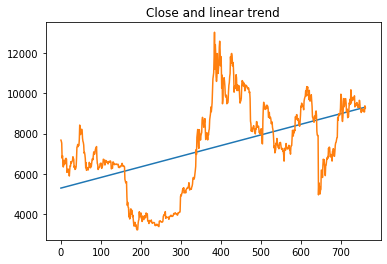

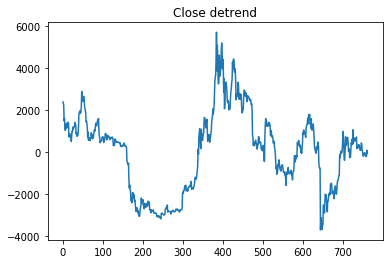

array([ 2.37191244e+03,  2.31333237e+03,  2.21513230e+03,  1.46391223e+03,
        1.57955216e+03,  1.24973209e+03,  1.01201202e+03,  1.33220195e+03,
        1.10817188e+03,  1.19649182e+03,  1.14034175e+03,  1.37063168e+03,
        1.40049161e+03,  1.40184154e+03,  1.34977147e+03,  6.98461399e+02,
        7.71991330e+02,  7.77481261e+02,  8.48171191e+02,  6.87401122e+02,
        7.45601053e+02,  4.86650983e+02,  7.96250914e+02,  9.76690845e+02,
        9.53250775e+02,  1.17635071e+03,  1.08650064e+03,  1.14920057e+03,
        1.18553050e+03,  1.21463043e+03,  1.39280036e+03,  1.30449029e+03,
        1.26710022e+03,  8.50040151e+02,  9.09540082e+02,  7.38380013e+02,
        7.42359943e+02,  7.75169874e+02,  8.53429805e+02,  1.23027974e+03,
        1.80430967e+03,  1.84878960e+03,  1.93960953e+03,  1.82161946e+03,
        1.88151939e+03,  1.87545932e+03,  2.16281925e+03,  2.87071918e+03,
        2.62257911e+03,  2.38750904e+03,  2.59567897e+03,  2.61755890e+03,
        2.63860883e+03,  

In [10]:
da.detrend('Close')

In [11]:
da.ma_smoothing(7)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lagged,ma_7
0,2018-06-07,7650.82,7741.27,7650.82,7678.24,4485799936,0,0,NaN,NaN
1,2018-06-08,7685.14,7698.19,7558.40,7624.92,4227579904,0,0,7678.24,NaN
2,2018-06-09,7632.52,7683.58,7531.98,7531.98,3845220096,0,0,7624.92,NaN
3,2018-06-10,7499.55,7499.55,6709.07,6786.02,5804839936,0,0,7531.98,7065.762857
4,2018-06-11,6799.29,6910.18,6706.63,6906.92,4745269760,0,0,6786.02,6922.492857
...,...,...,...,...,...,...,...,...,...,...
757,2020-07-03,9124.84,9202.34,9058.79,9087.30,13078970999,0,0,9123.41,9165.561429
758,2020-07-04,9084.23,9183.30,9053.63,9132.49,12290528515,0,0,9087.30,9181.490000
759,2020-07-05,9126.09,9162.18,8977.02,9073.94,12903406143,0,0,9132.49,NaN
760,2020-07-06,9072.85,9375.47,9058.66,9375.47,17889263252,0,0,9073.94,NaN


## Modelling

In [12]:
m = Modelling(da.df)

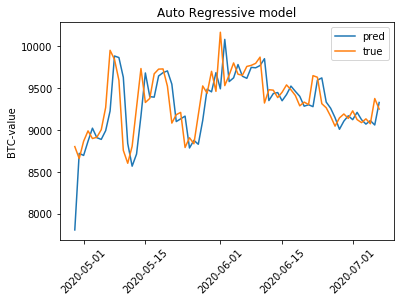

RMSE of Auto Regressive: 290.24


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
m.AutoRegressive()

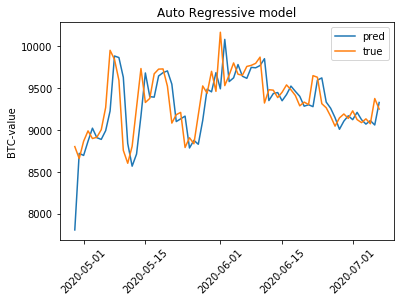

RMSE of Auto Regressive: 290.24


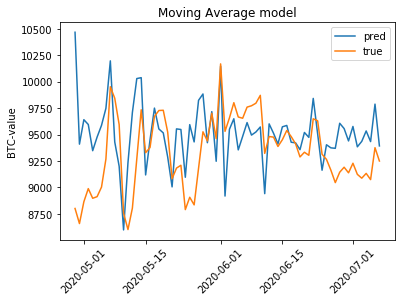

RMSE of Auto Regressive: 416.67


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
m.MovingAverage()

Epoch 1 completed!
Epoch 2 completed!
Epoch 3 completed!
Epoch 4 completed!
Epoch 5 completed!


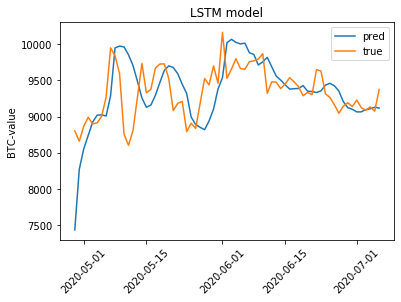

RMSE of LSTM: 407.16


In [15]:
y_pred = m.LSTM_model()

In [20]:
df = da.df.copy()

In [25]:
TEST_SIZE = int(len(df)*(9/10))
df_test = df[TEST_SIZE:]
y_true = df_test[7:len(df_test)-1]['Close'].values
table = pd.DataFrame({'y_pred': y_pred, 'y_true': y_true})
table['y_true_lagged'] = table['y_true'].shift(1)
table = table[1:]
table['dif_true'] = table['y_true'] - table['y_true_lagged']
table['dif_pred'] = table['y_pred'] - table['y_true_lagged']
table['sign_true'] = table['dif_true'].apply(lambda x: 1 if x>=0 else 0)
table['sign_pred'] = table['dif_pred'].apply(lambda x: 1 if x>=0 else 0)

In [48]:
table.head()

,y_pred,y_true,y_true_lagged,dif_true,dif_pred,sign_true,sign_pred
1,8268.144531,8658.55,8801.04,-142.49,-532.895469,0,0
2,8552.465820,8864.77,8658.55,206.22,-106.084180,1,0
3,8738.349609,8988.60,8864.77,123.83,-126.420391,1,0
4,8924.604492,8897.47,8988.60,-91.13,-63.995508,0,0
5,9019.111328,8912.65,8897.47,15.18,121.641328,1,1


In [40]:
confusion_matrix(table['sign_true'], table['sign_pred'])

array([[18, 14],
       [14, 22]])

In [47]:
print('F1-score: {}'.format(round(f1_score(table['sign_true'], table['sign_pred']),2 )))

F1-score: 0.61
